<h2>Concrete Strength Prediction using Neural Networks
 
<h5>In this Notebook, I'll use Neural Networks to predict the strength of samples of concrete from a dataset available publicly on Kaggle. My goal is to test out different models of neural networks, with different numbers of hidden layers and different training periods (epochs), and see how the performance of each version of the model compares to each other.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from keras.models import Sequential
from keras.layers import Dense
import statistics
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/concrete-data/04-Concrete_Data_V1.0 (1).csv


In [2]:
concrete_data = pd.read_csv('/kaggle/input/concrete-data/04-Concrete_Data_V1.0 (1).csv')

In [3]:
# Rename columns for consistency
concrete_data.columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength']

In [4]:
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

So we see that the data is already pretty clean, and we can commence with our regression task and start by building the model. To re-iterate, this is a **regression** problem.

We'll start off by building a **Baseline Model**, so we'll build the neural network with **1 hidden layer** with **10 nodes**, a **ReLU activation function**, **adam** optimizer, and **mean squared error** as the loss function.

In [7]:
def regression_model_1():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

We'll split the overall dataset in the train-test ratio 70:30, then we'll drop the 'Strength' column from both the train and test sets to produce the predictor and target features. Then we will fit the model on the training set, using the predictors to predict the target, then fit the trained model on the predictors from the test set. Lastly, we will calculate the MSE between the predicted values and the actual values.

In [8]:
train, test = train_test_split(concrete_data, test_size = .30)
train_predictors = train[train.columns[train.columns != 'Strength']]
n_cols = train_predictors.shape[1]
test_predictors = test[test.columns[test.columns != 'Strength']]
train_target = train[['Strength']]
test_target = test[['Strength']]
model = regression_model_1()
model.fit(train_predictors, train_target, epochs = 50, verbose = 0)
Yhat = model.predict(test_predictors)
mse_1 = mse(Yhat, test_target)
mse_1

10/10 [==============================] - 0s 2ms/step


277.44676092946906

Now, we'll repeat the steps above **50** times, and will try to obtain the **mean** and **standard deviation** of mean squared errors. At this point, we'll create an empty list to store the overall MSE means and standard deviations from each iteration of our model, this is will help us to visualise and compare performance.

In [9]:
ovr_mean_mse = []
ovr_standev_mse = []

In [10]:
mse_list = []
for i in range(1, 51):
    train, test = train_test_split(concrete_data, test_size = .30)
    train_predictors = train[train.columns[train.columns != 'Strength']]
    n_cols = train_predictors.shape[1]
    test_predictors = test[test.columns[test.columns != 'Strength']]
    train_target = train[['Strength']]
    test_target = test[['Strength']]
    model = regression_model_1()
    model.fit(train_predictors, train_target, epochs = 50, verbose = 0)
    Yhat = model.predict(test_predictors)
    mse_ = mse(Yhat, test_target)
    mse_list.append(mse_)
    print('Completed run {}'.format(i))

print('The mean of the MSE list is {}'.format(statistics.mean(mse_list)))
ovr_mean_mse.append(statistics.mean(mse_list))
print('The standard deviation of the MSE list is {}'.format(statistics.stdev(mse_list)))
ovr_standev_mse.append(statistics.stdev(mse_list))

10/10 [==============================] - 0s 1ms/step
Completed run 1
10/10 [==============================] - 0s 2ms/step
Completed run 2
10/10 [==============================] - 0s 1ms/step
Completed run 3
10/10 [==============================] - 0s 1ms/step
Completed run 4
10/10 [==============================] - 0s 1ms/step
Completed run 5
10/10 [==============================] - 0s 1ms/step
Completed run 6
10/10 [==============================] - 0s 1ms/step
Completed run 7
10/10 [==============================] - 0s 1ms/step
Completed run 8
10/10 [==============================] - 0s 990us/step
Completed run 9
10/10 [==============================] - 0s 2ms/step
Completed run 10
10/10 [==============================] - 0s 1ms/step
Completed run 11
10/10 [==============================] - 0s 1ms/step
Completed run 12
10/10 [==============================] - 0s 1ms/step
Completed run 13
10/10 [==============================] - 0s 1ms/step
Completed run 14
10/10 [====================

Now, we wil use a normalized version of the data, and repeat the steps above.

In [11]:
mse_list = []
for i in range(1, 51):
    train, test = train_test_split(concrete_data, test_size = .30)
    train_predictors = train[train.columns[train.columns != 'Strength']]
    n_cols = train_predictors.shape[1]
    test_predictors = test[test.columns[test.columns != 'Strength']]
    train_target = train[['Strength']]
    test_target = test[['Strength']]
    train_predictors_norm = (train_predictors - train_predictors.mean())/train_predictors.std()
    test_predictors_norm = (test_predictors - test_predictors.mean())/test_predictors.std()
    model = regression_model_1()
    model.fit(train_predictors_norm, train_target, epochs = 50, verbose = 0)
    Yhat = model.predict(test_predictors_norm)
    mse_ = mse(Yhat, test_target)
    mse_list.append(mse_)
    print('Completed run {}'.format(i))

print('The mean of the MSE list is {}'.format(statistics.mean(mse_list)))
ovr_mean_mse.append(statistics.mean(mse_list))
print('The standard deviation of the MSE list is {}'.format(statistics.stdev(mse_list)))
ovr_standev_mse.append(statistics.stdev(mse_list))

10/10 [==============================] - 0s 1ms/step
Completed run 1
10/10 [==============================] - 0s 1ms/step
Completed run 2
10/10 [==============================] - 0s 1ms/step
Completed run 3
10/10 [==============================] - 0s 1ms/step
Completed run 4
10/10 [==============================] - 0s 1ms/step
Completed run 5
10/10 [==============================] - 0s 999us/step
Completed run 6
10/10 [==============================] - 0s 1ms/step
Completed run 7
10/10 [==============================] - 0s 1ms/step
Completed run 8
10/10 [==============================] - 0s 1ms/step
Completed run 9
10/10 [==============================] - 0s 1ms/step
Completed run 10
10/10 [==============================] - 0s 1ms/step
Completed run 11
10/10 [==============================] - 0s 1ms/step
Completed run 12
10/10 [==============================] - 0s 1ms/step
Completed run 13
10/10 [==============================] - 0s 1ms/step
Completed run 14
10/10 [====================

Now, we'll increase the number of epochs to 100, while repeating the steps above.

In [12]:
mse_list = []
for i in range(1, 51):
    train, test = train_test_split(concrete_data, test_size = .30)
    train_predictors = train[train.columns[train.columns != 'Strength']]
    n_cols = train_predictors.shape[1]
    test_predictors = test[test.columns[test.columns != 'Strength']]
    train_target = train[['Strength']]
    test_target = test[['Strength']]
    train_predictors_norm = (train_predictors - train_predictors.mean())/train_predictors.std()
    test_predictors_norm = (test_predictors - test_predictors.mean())/test_predictors.std()
    model = regression_model_1()
    model.fit(train_predictors_norm, train_target, epochs = 100, verbose = 0)
    Yhat = model.predict(test_predictors_norm)
    mse_ = mse(Yhat, test_target)
    mse_list.append(mse_)
    print('Completed run {}'.format(i))
    
print('The mean of the MSE list is {}'.format(statistics.mean(mse_list)))
ovr_mean_mse.append(statistics.mean(mse_list))
print('The standard deviation of the MSE list is {}'.format(statistics.stdev(mse_list)))
ovr_standev_mse.append(statistics.stdev(mse_list))

10/10 [==============================] - 0s 1ms/step
Completed run 1
10/10 [==============================] - 0s 2ms/step
Completed run 2
10/10 [==============================] - 0s 1ms/step
Completed run 3
10/10 [==============================] - 0s 1ms/step
Completed run 4
10/10 [==============================] - 0s 1ms/step
Completed run 5
10/10 [==============================] - 0s 2ms/step
Completed run 6
10/10 [==============================] - 0s 2ms/step
Completed run 7
10/10 [==============================] - 0s 1ms/step
Completed run 8
10/10 [==============================] - 0s 1ms/step
Completed run 9
10/10 [==============================] - 0s 1ms/step
Completed run 10
10/10 [==============================] - 0s 962us/step
Completed run 11
10/10 [==============================] - 0s 1ms/step
Completed run 12
10/10 [==============================] - 0s 1ms/step
Completed run 13
10/10 [==============================] - 0s 1ms/step
Completed run 14
10/10 [====================

Now, we'll introduce **2** additional hidden layers to the NN, each with 10 nodes, and repeat the same steps, above, while keeping the number of training epochs at 50.

In [13]:
def regression_model_2():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [14]:
mse_list = []
for i in range(1, 51):
    train, test = train_test_split(concrete_data, test_size = .30)
    train_predictors = train[train.columns[train.columns != 'Strength']]
    n_cols = train_predictors.shape[1]
    test_predictors = test[test.columns[test.columns != 'Strength']]
    train_target = train[['Strength']]
    test_target = test[['Strength']]
    train_predictors_norm = (train_predictors - train_predictors.mean())/train_predictors.std()
    test_predictors_norm = (test_predictors - test_predictors.mean())/test_predictors.std()
    model = regression_model_2()
    model.fit(train_predictors_norm, train_target, epochs = 50, verbose = 0)
    Yhat = model.predict(test_predictors_norm)
    mse_ = mse(Yhat, test_target)
    mse_list.append(mse_)
    print('Completed run {}'.format(i))

print('The mean of the MSE list is {}'.format(statistics.mean(mse_list)))
ovr_mean_mse.append(statistics.mean(mse_list))
print('The standard deviation of the MSE list is {}'.format(statistics.stdev(mse_list)))
ovr_standev_mse.append(statistics.stdev(mse_list))

10/10 [==============================] - 0s 2ms/step
Completed run 1
10/10 [==============================] - 0s 1ms/step
Completed run 2
10/10 [==============================] - 0s 2ms/step
Completed run 3
10/10 [==============================] - 0s 2ms/step
Completed run 4
10/10 [==============================] - 0s 2ms/step
Completed run 5
10/10 [==============================] - 0s 1ms/step
Completed run 6
10/10 [==============================] - 0s 1ms/step
Completed run 7
10/10 [==============================] - 0s 1ms/step
Completed run 8
10/10 [==============================] - 0s 1ms/step
Completed run 9
10/10 [==============================] - 0s 1ms/step
Completed run 10
10/10 [==============================] - 0s 1ms/step
Completed run 11
10/10 [==============================] - 0s 2ms/step
Completed run 12
10/10 [==============================] - 0s 1ms/step
Completed run 13
10/10 [==============================] - 0s 1ms/step
Completed run 14
10/10 [======================

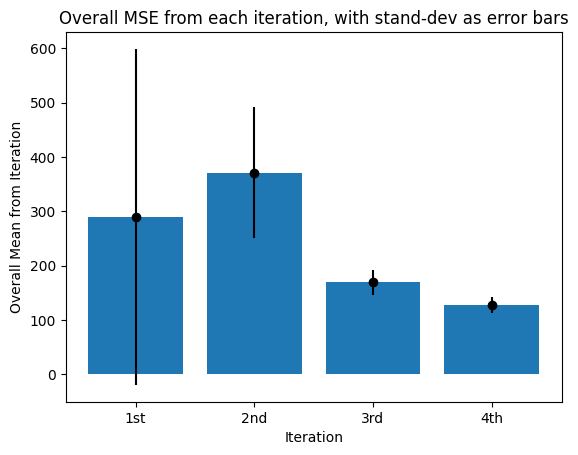

In [15]:
iteration_list = ['1st', '2nd', '3rd', '4th']
plt.bar(iteration_list, ovr_mean_mse)
plt.errorbar(iteration_list, ovr_mean_mse, yerr=ovr_standev_mse, fmt='o', color='black')
plt.title('Overall MSE from each iteration, with stand-dev as error bars')
plt.xlabel('Iteration')
plt.ylabel('Overall Mean from Iteration')
plt.show()

To summarize, in comparison to the first iteration, the second showed a similar mean, but a much reduced standard deviation. The subsequent iterations showed both much reduced mean and standard deviation, with the final iteration showing the least standard deviation.